In [2]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
df = pd.read_csv("scraping.csv")
df

,Unnamed: 0,text
0,0,Timestamp :\n0:00 opening\n0:25 disclaimer \n1...
1,1,"Team speaker Eggel, sudah punya yang Eggel Fit..."
2,2,Wah kebetulan lagi nyari Speaker Bluetooth yan...
3,3,"Masih QCY Box 2 tetap di hati, gua punya speak..."
4,4,This is where local industries start rising. P...
...,...,...
1419,1419,nah
1420,1420,Tod bacod
1421,1421,"sori gw dislike, textnya mengganggu gambar"
1422,1422,Rinrei


In [3]:
def clean(a,b):
    df['text']= df['text'].str.replace(a,b)

df['text'] = df['text'].astype(str).str.lower()
df.text = df.text.str.replace('\d+', '')
clean('.','')
clean(',','')
clean('-','')
clean('/','')
clean(':','')

df

C:\Users\jhonm\AppData\Local\Temp\ipykernel_19960\3028894041.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df.text = df.text.str.replace('\d+', '')
C:\Users\jhonm\AppData\Local\Temp\ipykernel_19960\3028894041.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['text']= df['text'].str.replace(a,b)


,Unnamed: 0,text
0,0,timestamp \n opening\n disclaimer \n iklan kop...
1,1,team speaker eggel sudah punya yang eggel fit ...
2,2,wah kebetulan lagi nyari speaker bluetooth yan...
3,3,masih qcy box tetap di hati gua punya speaker...
4,4,this is where local industries start rising pr...
...,...,...
1419,1419,nah
1420,1420,tod bacod
1421,1421,sori gw dislike textnya mengganggu gambar
1422,1422,rinrei


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df['text'].values.astype('U'))  ## Even astype(str) would work


In [26]:
from sklearn.cluster import DBSCAN
model =DBSCAN(eps=1, min_samples=2)
model.fit(x)
labels=model.labels_
new_df=pd.DataFrame(list(zip(df['text'],labels)),columns=['title','cluster'])
print(new_df.sort_values(by=['cluster']))
new_df.to_csv('new.csv')

                                                  title  cluster
817   rosting dikit  pake topi dengerin musik bang v...       -1
314   yang acome itu ada jamnya pas ditutup belakang...       -1
1201                            dpt acome di hrg  whehe       -1
972                           spektum analizernya mana?       -1
310                makasih bang sangat membantu sekali        -1
...                                                 ...      ...
545           bang review proyektor mini buat di kamar         1
854                         konten projector murah bang        2
646       review projector portable wireless murah bang        2
791   aku sebelum beli speaker bluetooth tonton sini...        3
792   aku sebelum beli speaker bluetooth tonton sini...        3

[1424 rows x 2 columns]




Cluster: 0
Titles


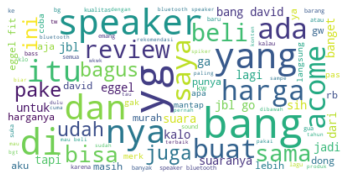

      cluster                                               wiki
0           0  timestamp \n opening\n disclaimer \n iklan kop...
1           0  team speaker eggel sudah punya yang eggel fit ...
2           0  wah kebetulan lagi nyari speaker bluetooth yan...
3           0  masih qcy box  tetap di hati gua punya speaker...
4           0  this is where local industries start rising pr...
...       ...                                                ...
1419        0                                                nah
1420        0                                          tod bacod
1421        0          sori gw dislike textnya mengganggu gambar
1422        0                                             rinrei
1423        0                                                   

[1424 rows x 2 columns]


ValueError: We need at least 1 word to plot a word cloud, got 0.

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
result={'cluster':labels,'wiki':df['text']}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['wiki'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('')
   print('')
   print('Cluster: {}'.format(k))
   print('Titles')
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()
   print(s)
   result
